<a href="https://colab.research.google.com/github/tarakantaacharya/Future_location_predictor/blob/analysis/Analysisandprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predict future locations
predictions = model.predict(X_test)

# Show predicted vs actual locations
for i in range(5):  # Show first 5 predictions
    print(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9804e-04
Test Loss: 0.00019199206144548953
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted: [0.31353796 0.41728342], Actual: [0.31455827 0.42292579]
Predicted: [0.31473514 0.41768098], Actual: [0.31480131 0.42286965]
Predicted: [0.31472412 0.41803914], Actual: [0.31504436 0.42286965]
Predicted: [0.31493556 0.41797   ], Actual: [0.3152874  0.42281352]
Predicted: [0.31513333 0.4178887 ], Actual: [0.3155912  0.42281352]


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('best_model.keras')

# Make predictions
predictions = loaded_model.predict(X_test)
print(predictions)

 36/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.31465587 0.42290372]
 [0.31482834 0.42304057]
 [0.3152486  0.42348304]
 ...
 [0.9670246  0.83013636]
 [0.96715915 0.8302737 ]
 [0.967152   0.83030754]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.00019199208985312477
Mean Absolute Error (MAE): 0.005052931378607698


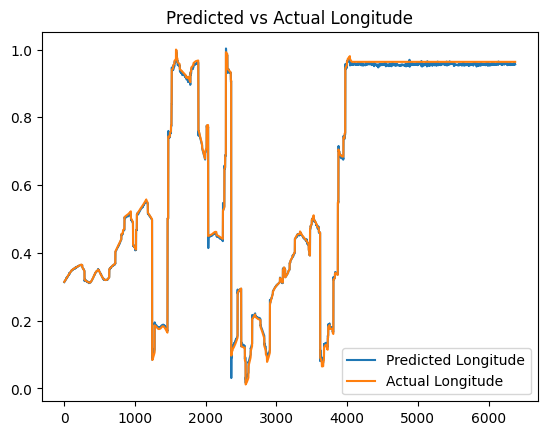

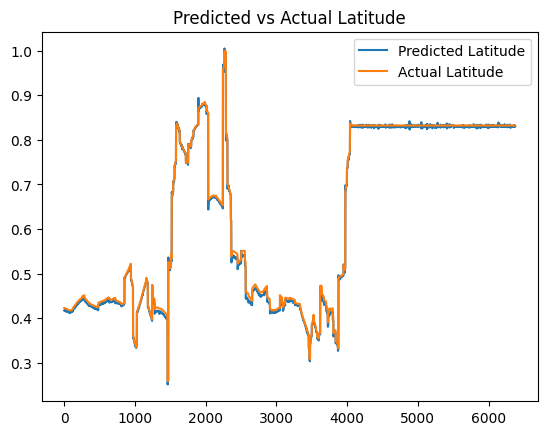

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values for Longitude
plt.plot(predictions[:, 0], label="Predicted Longitude")
plt.plot(y_test[:, 0], label="Actual Longitude")
plt.legend()
plt.title('Predicted vs Actual Longitude')
plt.show()

# Plot predicted vs actual values for Latitude
plt.plot(predictions[:, 1], label="Predicted Latitude")
plt.plot(y_test[:, 1], label="Actual Latitude")
plt.legend()
plt.title('Predicted vs Actual Latitude')
plt.show()


In [ ]:
# Example to denormalize predictions
predictions_rescaled = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], X_train.shape[2]-2))], axis=1))[:, :2]
y_test_rescaled = scaler.inverse_transform(np.concatenate([y_test, np.zeros((y_test.shape[0], X_train.shape[2]-2))], axis=1))[:, :2]
# Show some predictions and compare with actuals
for i in range(5):
    print(f"Predicted (denormalized): {predictions_rescaled[i]}, Actual (denormalized): {y_test_rescaled[i]}")


Predicted (denormalized): [12.51708321 55.78290549], Actual (denormalized): [12.5171   55.783006]
Predicted (denormalized): [12.51710291 55.78291257], Actual (denormalized): [12.517104 55.783005]
Predicted (denormalized): [12.51710273 55.78291895], Actual (denormalized): [12.517108 55.783005]
Predicted (denormalized): [12.51710621 55.78291772], Actual (denormalized): [12.517112 55.783004]
Predicted (denormalized): [12.51710946 55.78291627], Actual (denormalized): [12.517117 55.783004]
